<a href="https://colab.research.google.com/github/HariSudhan76/FeatureEngineering/blob/Missing-Data-Imputation/MissingData_Imputation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from google.colab import drive
drive.mount("/content/gdrive")


Mounted at /content/gdrive


In [5]:
cols_to_use = ["OverallQual",
               "TotalBsmtSF",
               "1stFlrSF",
               "GrLivArea",
               "BsmtUnfSF",
               "GarageArea",
               "SalePrice",
               "LotFrontage",
               "MasVnrArea",
               "GarageYrBlt",
               "FireplaceQu"
               ]
data = pd.read_csv("/content/gdrive/My Drive/ML Code/Missing Data/houseprice.csv",usecols=cols_to_use)
data.head()

,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,FireplaceQu,GarageYrBlt,GarageArea,SalePrice
0,65.0,7,196.0,150,856,856,1710,NaN,2003.0,548,208500
1,80.0,6,0.0,284,1262,1262,1262,TA,1976.0,460,181500
2,68.0,7,162.0,434,920,920,1786,TA,2001.0,608,223500
3,60.0,7,0.0,540,756,961,1717,Gd,1998.0,642,140000
4,84.0,8,350.0,490,1145,1145,2198,TA,2000.0,836,250000


In [6]:
x_train, x_test, y_train, y_test = train_test_split(
    data.drop("SalePrice", axis=1),
    data["SalePrice"],
    test_size=0.2,
    random_state=0
)

x_train.shape, x_test.shape


((1168, 10), (292, 10))

In [ ]:
var_to_impute = []
for var in x_train.columns:
  if x_train[var].isnull().sum()>0:
    var_to_impute.append(var)

var_to_impute

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [16]:
var_to_impute = [var for var in x_train.columns if x_train[var].isnull().sum()>0]
var_to_impute

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [18]:
imp_dict = x_train[var_to_impute].median().to_dict()
imp_dict

{'LotFrontage': 69.0, 'MasVnrArea': 0.0, 'GarageYrBlt': 1979.0}

In [19]:
x_train.fillna(imp_dict,inplace=True)
x_test.fillna(imp_dict,inplace=True)

In [7]:
x_train.isnull().sum()


LotFrontage    212
OverallQual      0
MasVnrArea       6
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
GrLivArea        0
FireplaceQu    551
GarageYrBlt     58
GarageArea       0
dtype: int64

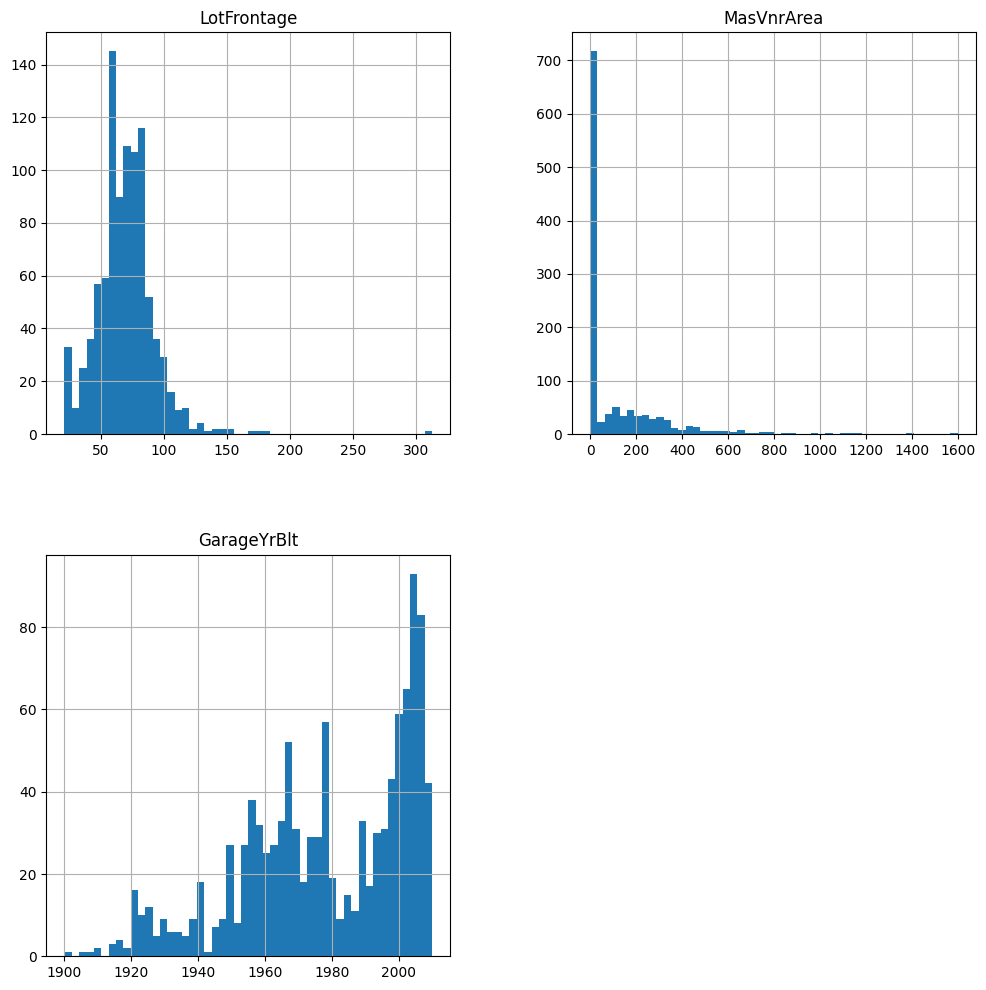

In [17]:
x_train[var_to_impute].hist(bins=50,figsize=(12,12))
plt.show()

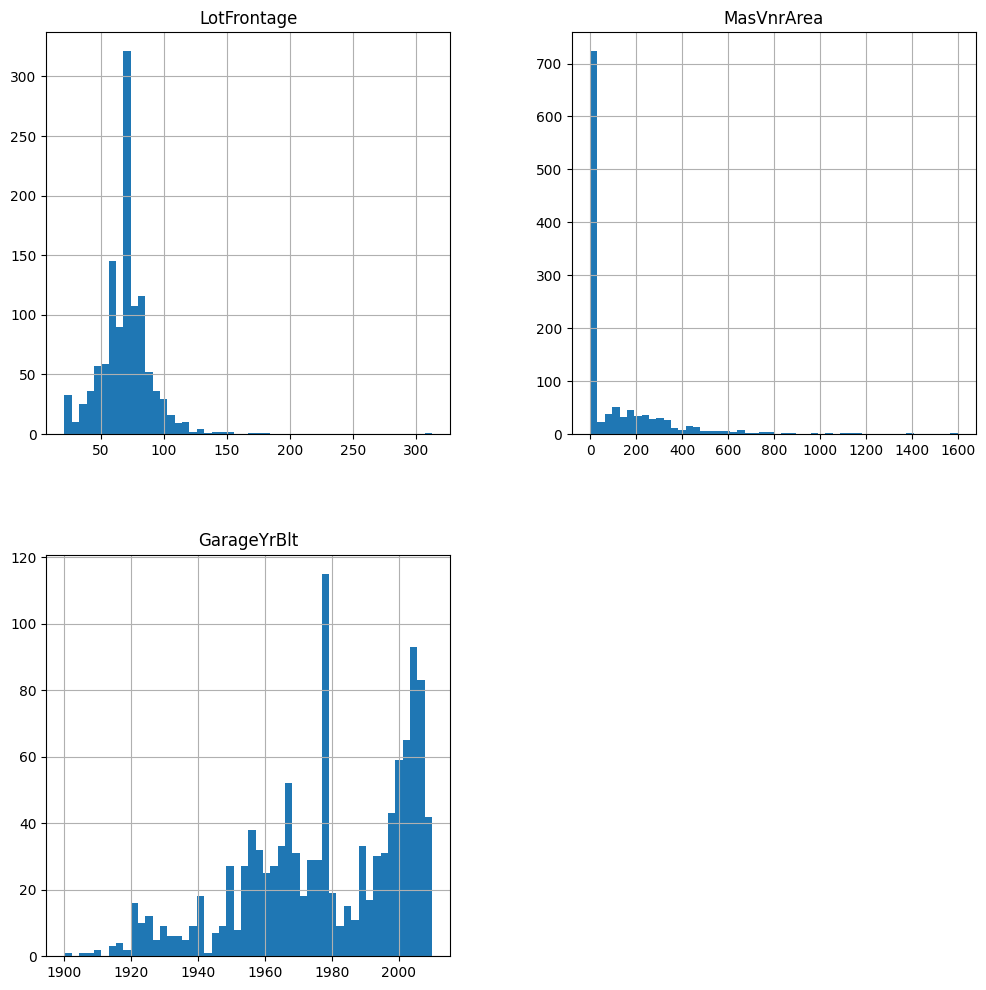

In [20]:
x_train[var_to_impute].hist(bins=50,figsize=(12,12))
plt.show()

In [22]:
var_list = [var for var in x_train.columns if x_train[var].isnull().sum()>0]
var_cat = list(x_train[var_list].select_dtypes(exclude="number").columns)
var_num = list(x_train[var_list].select_dtypes(include="number").columns)


(['FireplaceQu'], ['LotFrontage', 'MasVnrArea', 'GarageYrBlt'])

In [25]:
imp_dict = x_train[var_cat].mode().iloc[0].to_dict()
imp_dict.update(x_train[var_num].median().to_dict())


{'FireplaceQu': 'Gd',
 'LotFrontage': 69.0,
 'MasVnrArea': 0.0,
 'GarageYrBlt': 1979.0}

In [31]:
x_train.fillna(imp_dict,inplace=True)

In [32]:
x_train[var_list].isnull().sum()

LotFrontage    0
MasVnrArea     0
FireplaceQu    0
GarageYrBlt    0
dtype: int64